# Exploration of the Single MORDM Overijssel

This file follows the approach of the corresponding report. Within the exploration of the single MORDM Overijssel, 3 analyses will be conducted. This file has the following subchapters:
- initializing model
- Retrieve the policies & outcomes
- Analysis (1): Trade-off analysis
- Analysis (2): Open exploration
- Analysis (3): Best-case-worst-case selection

In [2]:
# Import general python packages
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt

import seaborn as sns

# Import functions
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation
from problem_formulation import sum_over,time_step_0,time_step_1

# Loading in the necessary modules for EMA workbench and functions
from ema_workbench import (Model, Scenario, Constraint, ScalarOutcome)
from ema_workbench.util import ema_logging
from ema_workbench import save_results, load_results
from ema_workbench.analysis import feature_scoring, prim, parcoords


## Model initializen

In [3]:

def initialize_model():
    ema_logging.log_to_stderr(ema_logging.INFO)
    print("Initializing model...")
    dike_model, planning_steps = get_model_for_problem_formulation(7)
    print("Model initialized.")
    return dike_model, planning_steps

# Writing a function to create actor specific problem formulations
def problem_formulation_actor(problem_formulation_actor, uncertainties, levers):
    # Load the model:
    function = DikeNetwork()
    # workbench model:
    model = Model('dikesnet', function=function)
    # Outcomes are all costs, thus they have to minimized:
    direction = ScalarOutcome.MINIMIZE

    model.uncertainties = uncertainties
    model.levers = levers

    cost_variables = []
    cost_variables.extend(
    [
        f"{dike}_{e}"
        for e in ["Expected Annual Damage", "Dike Investment Costs"]
        for dike in function.dikelist
    ])
    cost_variables.extend([f"RfR Total Costs"])
    cost_variables.extend([f"Expected Evacuation Costs"])

    if problem_formulation_actor == 6:  # GELDERLAND
        model.outcomes.clear()
        model.outcomes = [
            ScalarOutcome(f'Total_period_Costs_0',
                          variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
                          function=time_step_0, kind=direction),
            ScalarOutcome(f'Total_period_Costs_1',
                          variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
                          function=time_step_1, kind=direction),
            # ScalarOutcome(f'Total_period_Costs_2',
            #               variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
            #               function=time_step_2, kind=direction),
            # ScalarOutcome(f'Total_period_Costs_3',
            #               variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
            #               function=time_step_3, kind=direction),
            # ScalarOutcome(f'Total_period_Costs_4',
            #               variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
            #               function=time_step_4, kind=direction),
            ScalarOutcome('Expected Annual Damage A1_', variable_name='A.1_Expected Annual Damage', function=sum_over,
                          kind=direction),
            ScalarOutcome('Expected Annual Damage A2_', variable_name='A.2_Expected Annual Damage', function=sum_over,
                          kind=direction),
            ScalarOutcome('Expected Annual Damage A3_', variable_name='A.3_Expected Annual Damage', function=sum_over,
                          kind=direction),
            ScalarOutcome('Total Costs', variable_name=cost_variables, function=sum_over, kind=direction),
            ScalarOutcome("Expected Number of Deaths_", variable_name=
            [f"{dike}_Expected Number of Deaths" for dike in function.dikelist], function=sum_over, kind=direction)]


    elif problem_formulation_actor == 7:  # OVERIJSSEL
        model.outcomes.clear()
        model.outcomes = [
            ScalarOutcome(f'Total_period_Costs_0',
                          variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
                          function=time_step_0, kind=direction),
            ScalarOutcome(f'Total_period_Costs_1',
                          variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
                          function=time_step_1, kind=direction),
            # ScalarOutcome(f'Total_period_Costs_2',
            #               variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
            #               function=time_step_2, kind=direction),
            # # ScalarOutcome(f'Total_period_Costs_3',
            #               variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
            #               function=time_step_3, kind=direction),
            # # ScalarOutcome(f'Total_period_Costs_4',
            #               variable_name=dike_model.outcomes['Total_period_Costs'].variable_name,
            #               function=time_step_4, kind=direction),
            ScalarOutcome('Expected Annual Damage A4_', variable_name='A.4_Expected Annual Damage', function=sum_over,
                          kind=direction),
            ScalarOutcome('Expected Annual Damage A5_', variable_name='A.5_Expected Annual Damage', function=sum_over,
                          kind=direction),
            ScalarOutcome('Total Costs', variable_name=cost_variables, function=sum_over, kind=direction),
            ScalarOutcome("Expected Number of Deaths_", variable_name=
            [f"{dike}_Expected Number of Deaths" for dike in function.dikelist], function=sum_over, kind=direction)]

    else:
        raise TypeError('unknown identifier')
    return model

### Overijssel
if __name__ == '__main__':
    dike_model, planning_steps = initialize_model()

    uncertainties = dike_model.uncertainties
    levers = dike_model.levers
    
    model = problem_formulation_actor(7, uncertainties, levers)

    # Deepcopying the uncertainties and levers
    uncertainties = copy.deepcopy(dike_model.uncertainties)
    levers = copy.deepcopy(dike_model.levers)

    # Running the optimization for Overijssel
    function = DikeNetwork()

Initializing model...
Model initialized.


## Retrieving the policies and outcomes 

In [4]:
#read a CSV file into a DataFrame
rf_policy_set= pd.read_csv('Overijssel_MORDM_Policies.csv')

In [5]:
policy_set = rf_policy_set.loc[~rf_policy_set.iloc[:, 1:51].duplicated()]
policies_o = policy_set.iloc[:,1:51]

## Analysis (1): Trade-off Analysis


C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

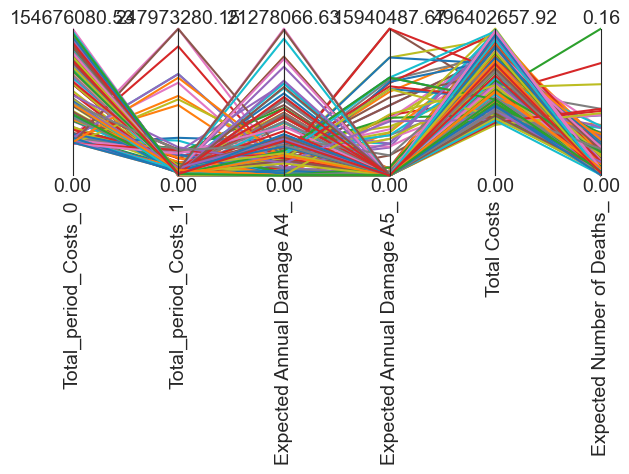

<Figure size 2400x1800 with 0 Axes>

In [6]:
# creating the variables
df_outcomes = policy_set.loc[:, [o.name for o in model.outcomes]]
ref_limits = parcoords.get_limits(df_outcomes)
ref_limits.loc[0, df_outcomes.columns] = 0

paraxes = parcoords.ParallelAxes(ref_limits)

# Set the figure size to a larger dimension
plt.figure(figsize=(24, 18)) 

paraxes.plot(df_outcomes)
plt.show()

## Analysis (2): Open Exploration analysis 

In [7]:
experiments, outcomes = load_results('Exploration_Overijssel.tar.gz')

[MainProcess/INFO] results loaded successfully from C:\Users\Gebruiker\OneDrive - Delft University of Technology\EPA\Q4 Model based decision making\epa141A_open\final_ass_time_changed\Exploration_Overijssel.tar.gz


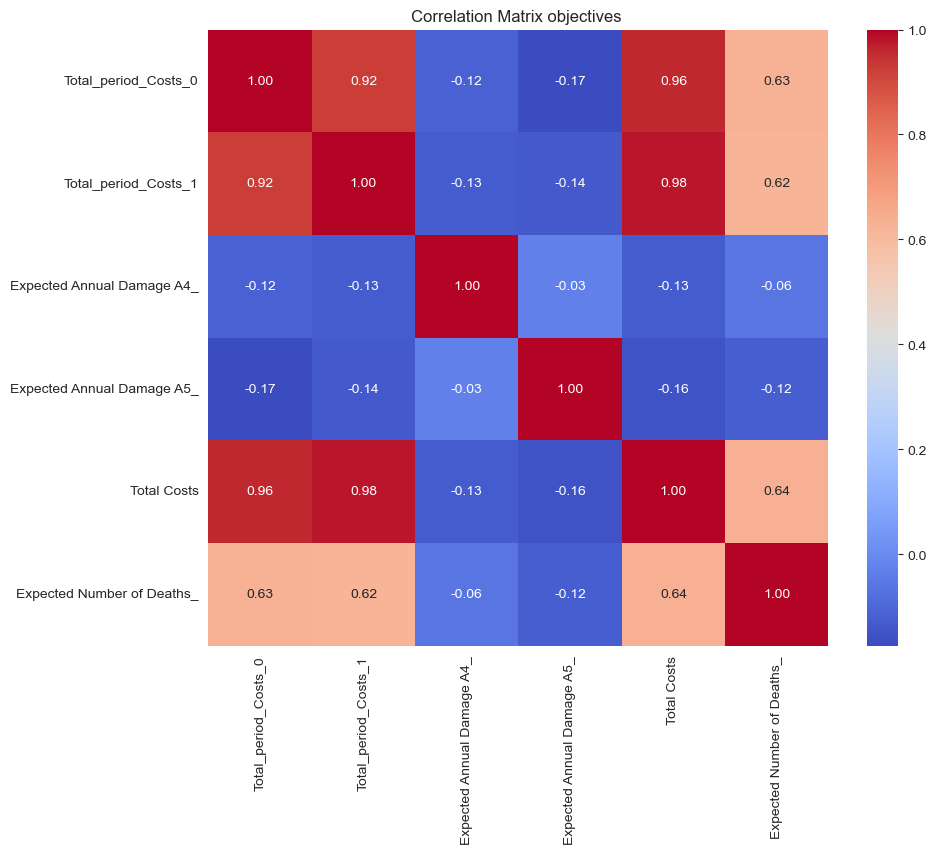

In [34]:
# Correlation Matrix
data = {}
for k,v in outcomes.items():
    if len(v.shape)>1:
        v=v[:,-1]
    data[k] = v
data = pd.DataFrame.from_dict(data)

#calcualting correlations between the outcomes of interest
correlations = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix objectives ')
plt.show()


C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\multiclass.py:380: RuntimeWarning: invalid value encountered in cast
  if xp.any(data != data.astype(int)):


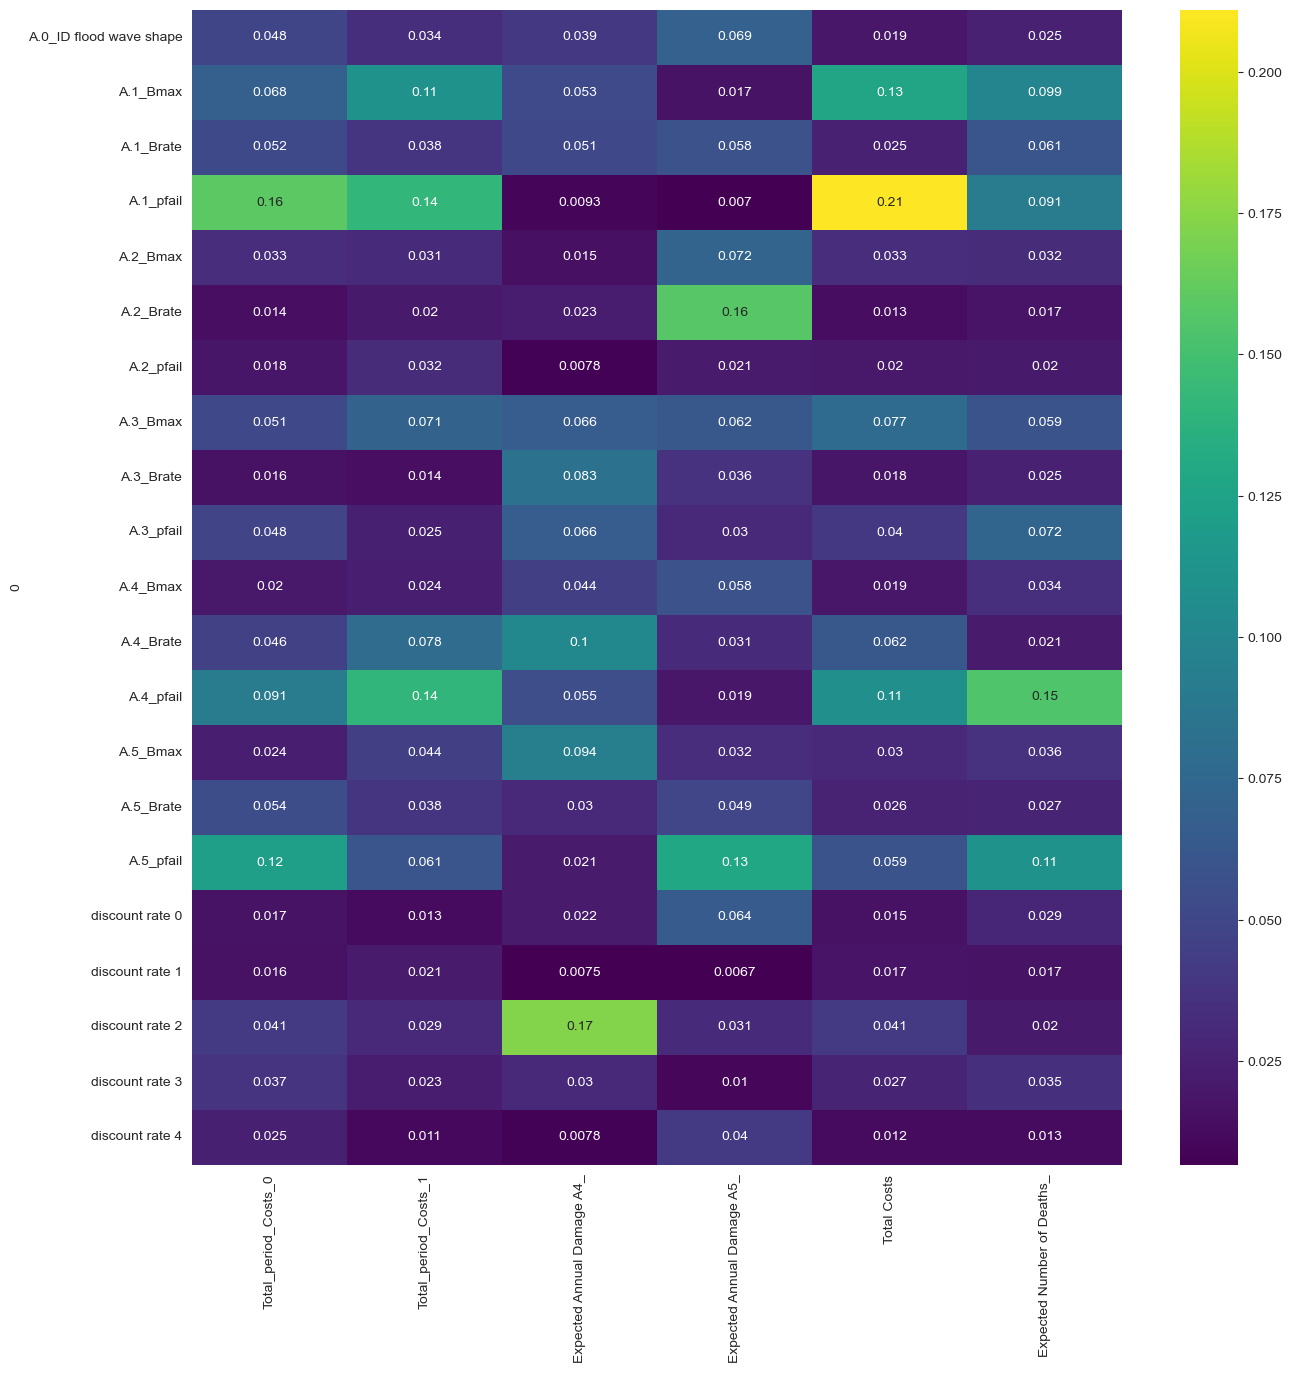

In [9]:
# Feature scoring 
x = experiments.iloc[:,:21]
y = outcomes

fs = feature_scoring.get_feature_scores_all(x, y)

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(fs, cmap='viridis', annot=True)

plt.show()

### PRIM

[MainProcess/INFO] 2340 points remaining, containing 584 cases of interest
[MainProcess/INFO] mean: 0.8504273504273504, mass: 0.1, coverage: 0.3407534246575342, density: 0.8504273504273504 restricted_dimensions: 5


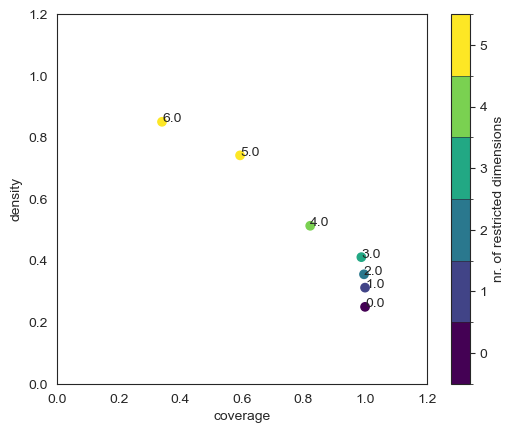

In [54]:

data = outcomes['Expected Number of Deaths_']

y = data < np.percentile(data, 25)

# Initialize PRIM algorithm with the appropriate mode
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

box1.show_tradeoff(annotated=True)
plt.show()

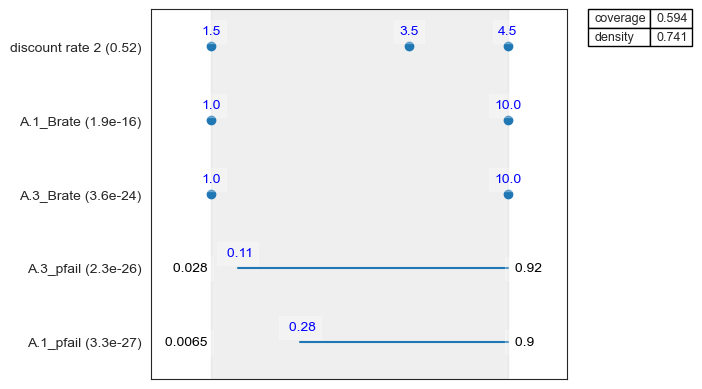

In [56]:
point=5
box1.inspect(point, style='graph')
plt.show()

## Analysis (3): Best-case-worst-case selection 

In [57]:
## Best case, Worst case

C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\Gebruiker\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

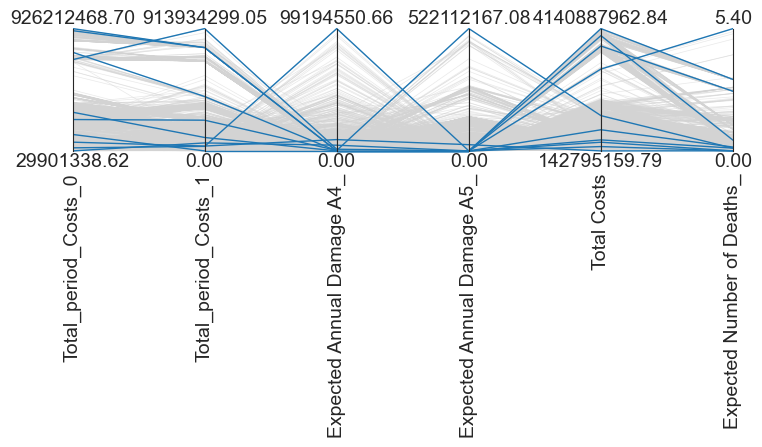

In [57]:
all_data = pd.DataFrame({k:v for k,v in outcomes.items()})

# let's get the unique indices for the minima and maxima across 
# all objectives
indices = pd.concat([all_data.idxmax(), all_data.idxmin()]).unique()

limits = parcoords.get_limits(all_data)
axes = parcoords.ParallelAxes(limits)


axes.plot(all_data, color='lightgrey', lw=0.5, alpha=0.5)
axes.plot(all_data.iloc[indices, :], color=sns.color_palette()[0], lw=1)

fig = plt.gcf()
fig.set_size_inches((8, 4))

plt.show()

In [59]:
print(all_data.idxmax())

Total_period_Costs_0          1361
Total_period_Costs_1          1851
Expected Annual Damage A4_    1266
Expected Annual Damage A5_    1035
Total Costs                    201
Expected Number of Deaths_     900
dtype: int64


In [60]:
print(all_data.idxmin())

Total_period_Costs_0          1102
Total_period_Costs_1             2
Expected Annual Damage A4_       0
Expected Annual Damage A5_       0
Total Costs                   2042
Expected Number of Deaths_       2
dtype: int64


In [66]:
x.columns

Index(['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
       'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
       'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax',
       'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1',
       'discount rate 2', 'discount rate 3', 'discount rate 4'],
      dtype='object')

In [70]:
# also all we need are the uncertainty columns
selected = experiments.loc[[ 1361, 1851, 1266,1035, 900, 201, 0,2, 2042, 1102], x.columns]
selected

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_Brate,A.4_pfail,A.5_Bmax,A.5_Brate,A.5_pfail,discount rate 0,discount rate 1,discount rate 2,discount rate 3,discount rate 4
1361,99,342.573170,1.0,0.006520,143.566573,1.0,0.511725,312.726138,1.0,0.227333,...,1.0,0.015829,168.090726,1.0,0.960803,2.5,2.5,2.5,2.5,4.5
1851,99,342.573170,1.0,0.006520,143.566573,1.0,0.511725,312.726138,1.0,0.227333,...,1.0,0.015829,168.090726,1.0,0.960803,2.5,2.5,2.5,2.5,4.5
1266,0,41.980617,1.0,0.457372,168.458749,1.0,0.410702,349.010233,1.0,0.921564,...,10.0,0.220426,84.601336,1.5,0.604236,4.5,2.5,1.5,3.5,4.5
1035,127,302.302032,1.5,0.263603,324.530110,10.0,0.023509,275.812226,10.0,0.763824,...,1.5,0.314891,223.736426,1.5,0.023952,4.5,1.5,2.5,1.5,2.5
900,66,143.900029,1.0,0.882071,203.408118,1.0,0.204834,227.263060,1.0,0.028390,...,10.0,0.130192,112.444287,10.0,0.895424,1.5,4.5,1.5,4.5,2.5
201,99,342.573170,1.0,0.006520,143.566573,1.0,0.511725,312.726138,1.0,0.227333,...,1.0,0.015829,168.090726,1.0,0.960803,2.5,2.5,2.5,2.5,4.5
